<a href="https://colab.research.google.com/github/rmaengenheiro/pycaret/blob/main/AutoML_PyCaret_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Classificação AutoML - PyCaret

### **Preparando o ambiente**

In [ ]:
#Instalando PyCaret
!pip install pycaret

In [3]:
# check version
from pycaret.utils import version
version()

'2.3.10'

### Carregando os dados

In [5]:
#Carregando a base de dados
import pandas as pd
dados = pd.read_csv("../PesquisaClientes.csv")
dados.head()

,ID Usuario,Sexo,Idade,Salario Estimado,Compraria Produto?
0,15624510,Masculino,19,19000,Nao
1,15810944,Masculino,35,20000,Nao
2,15668575,Feminino,26,43000,Nao
3,15603246,Feminino,27,57000,Nao
4,15804002,Masculino,19,76000,Nao


### Inicializando Configuração - AutoML PyCaret

In [ ]:
from pycaret.classification import *
config = setup(dados, target = 'Compraria Produto?')

## Comparando Modelos - AutoML

In [13]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9069,0.9556,0.8736,0.8778,0.8710,0.7987,0.8037,0.012
et,Extra Trees Classifier,0.9069,0.9495,0.8818,0.8696,0.8730,0.7997,0.8027,0.299
rf,Random Forest Classifier,0.8962,0.9487,0.8818,0.8507,0.8614,0.7788,0.7842,0.217
nb,Naive Bayes,0.8927,0.9518,0.8336,0.8738,0.8489,0.7664,0.7713,0.013
ada,Ada Boost Classifier,0.8925,0.9390,0.8345,0.8845,0.8485,0.7663,0.7771,0.088
dt,Decision Tree Classifier,0.8819,0.8769,0.8545,0.8417,0.8425,0.7489,0.7552,0.015
gbc,Gradient Boosting Classifier,0.8819,0.9513,0.8427,0.8469,0.8401,0.7469,0.7520,0.075
lightgbm,Light Gradient Boosting Machine,0.8712,0.9508,0.8427,0.8214,0.8276,0.7252,0.7302,0.057
lda,Linear Discriminant Analysis,0.8638,0.9283,0.7736,0.8464,0.7999,0.6982,0.7075,0.014
ridge,Ridge Classifier,0.8602,0.0000,0.7636,0.8442,0.7936,0.6895,0.6990,0.013


INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 4
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


## Criando Modelo

In [14]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8957,0.8182,0.8182,0.8182,0.7005,0.7005
1,0.9643,0.9947,1.0000,0.9167,0.9565,0.9263,0.9288
2,0.8929,0.9139,0.9000,0.8182,0.8571,0.7717,0.7740
3,0.8929,0.9389,0.9000,0.8182,0.8571,0.7717,0.7740
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8571,0.9361,0.7000,0.8750,0.7778,0.6744,0.6835
6,0.8571,0.9111,0.9000,0.7500,0.8182,0.7021,0.7100
7,0.8214,0.9389,0.9000,0.6923,0.7826,0.6354,0.6512
8,0.8929,0.9750,0.9000,0.8182,0.8571,0.7717,0.7740


INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1136, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Otimizando Hyperparâmetros

In [15]:
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8214,0.9412,0.8182,0.7500,0.7826,0.6316,0.6333
1,0.9643,0.9893,1.0000,0.9167,0.9565,0.9263,0.9288
2,0.8929,0.9167,0.9000,0.8182,0.8571,0.7717,0.7740
3,0.9286,0.9889,1.0000,0.8333,0.9091,0.8511,0.8607
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9286,0.9389,0.9000,0.9000,0.9000,0.8444,0.8444
6,0.8571,0.9167,0.9000,0.7500,0.8182,0.7021,0.7100
7,0.8571,0.9389,1.0000,0.7143,0.8333,0.7143,0.7454
8,0.9286,0.9778,0.9000,0.9000,0.9000,0.8444,0.8444


INFO:logs:create_model_container: 44
INFO:logs:master_model_container: 44
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=1136, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## Analisando Modelos

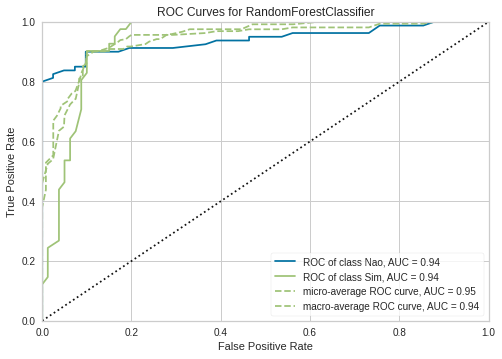

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(rf)

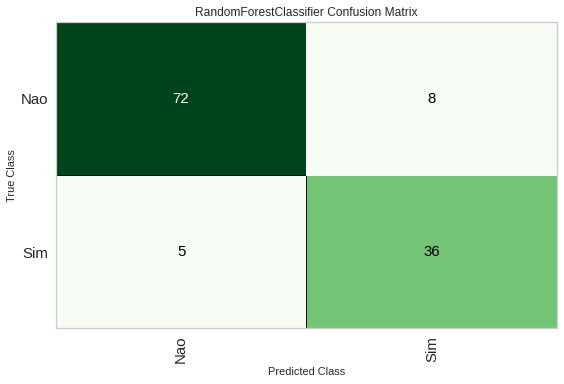

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(rf, plot = 'confusion_matrix')

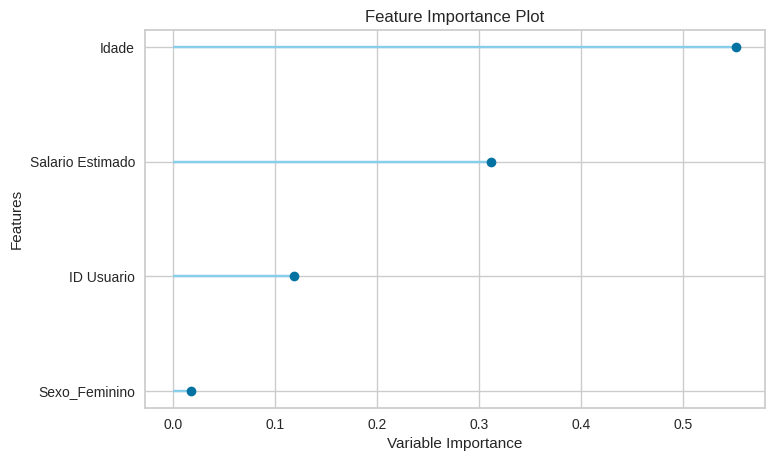

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(rf, plot = 'feature')

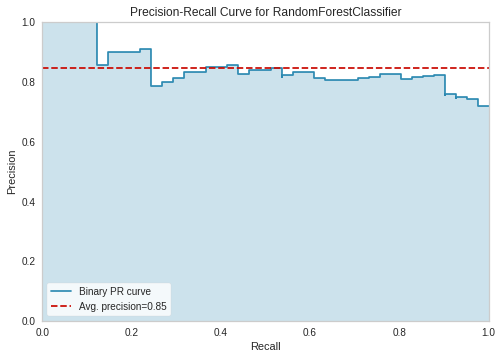

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(rf, plot = 'pr')

## Otimizar AutoML

In [22]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=1136, verbose=0, warm_start=False), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=T

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=1136, verbose=0, warm_start=False)

## Modelo Preditivo

In [26]:
pred_holdouts = predict_model(rf)
pd.DataFrame(pred_holdouts)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1136, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8926,0.9401,0.878,0.8182,0.8471,0.7644,0.7655


,ID Usuario,Idade,Salario Estimado,Sexo_Feminino,Compraria Produto?,Label,Score
0,15697686.0,29.0,80000.0,0.0,Nao,Nao,0.96
1,15730448.0,24.0,84000.0,0.0,Nao,Nao,0.99
2,15664907.0,58.0,144000.0,0.0,Sim,Sim,0.74
3,15609637.0,41.0,72000.0,1.0,Nao,Nao,0.97
4,15678168.0,41.0,51000.0,1.0,Nao,Nao,1.00
...,...,...,...,...,...,...,...
116,15622585.0,39.0,96000.0,0.0,Sim,Sim,0.89
117,15581282.0,37.0,74000.0,0.0,Nao,Nao,0.73
118,15810944.0,35.0,20000.0,0.0,Nao,Nao,0.99
119,15795224.0,36.0,126000.0,1.0,Sim,Sim,0.86


In [30]:
new_data = dados.copy()
new_data.drop(['Compraria Produto?'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=1136, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,ID Usuario,Sexo,Idade,Salario Estimado,Label,Score
0,15624510,Masculino,19,19000,Nao,0.9708
1,15810944,Masculino,35,20000,Nao,0.9416
2,15668575,Feminino,26,43000,Nao,0.9779
3,15603246,Feminino,27,57000,Nao,0.9707
4,15804002,Masculino,19,76000,Nao,0.9700
...,...,...,...,...,...,...
395,15691863,Feminino,46,41000,Sim,0.8792
396,15706071,Masculino,51,23000,Sim,0.9030
397,15654296,Feminino,50,20000,Sim,0.9110
398,15755018,Masculino,36,33000,Nao,0.9306


## Salvar|Carregar Modelo

In [31]:
save_model(best, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=1136, verbose=0, warm_start=False), model_name=best-model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                            

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Compraria Produto?',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
          

In [32]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=best-model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Compraria Produto?',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criteri

In [34]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='Compraria Produto?', time_features=[])

In [35]:
from sklearn import set_config
set_config(display='text')